# **Proyek Analisis Data: Bike Sharing Dataset**
- **Nama:** Asyrafil Nur Azis
- **Email:** azisasyrafil@gmail.com
- **ID Dicoding:** azisasyrafil

## List Pertanyaan Bisnis
- Bagaimana tren penyewaan sepeda sepanjang tahun 2011 dan 2012?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Bagaimana pengaruh hari biasa dan hari libur terhadap jumlah penyewaan sepeda?
- Berapa rata rata jumlah penyewaan sepeda per jam dan bagaimana variasinya sepanjang hari?



## Import Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

## Data Wrangling

### *Gathering Data*

Load tabel day dan hour

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
print("Jumlah baris di DataFrame day:", day_df.shape[0])

Jumlah baris di DataFrame day: 731


In [5]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
print("Jumlah baris di DataFrame hour:", hour_df.shape[0])

Jumlah baris di DataFrame hour: 17379


### *Assessing Data*

**Checking data pada DataFrame**

In [7]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
print("Jumlah duplikasi data: ", day_df.duplicated().sum())

Jumlah duplikasi data:  0


In [10]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah duplikasi data: ", hour_df.duplicated().sum())

Jumlah duplikasi data:  0


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Menggabungkan setiap data menjadi satu DataFrame**

In [15]:
all_bike_df = hour_df.merge(day_df, on = 'dteday', how = 'inner', suffixes = ('_hour','_day'))
all_bike_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [16]:
all_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

### *Cleaning Data*

- Menghapus tabel yang tidak diperlukan

In [17]:
del hour_df

- Menghapus beberapa kolom yang tidak akan digunakan

In [18]:
drop_col = ['instant', 'windspeed']

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


- Mengubah beberapa detail tentang kolom

In [19]:
# Mengubah nama judul kolom
day_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'weathersit': 'weather_cond',
    'cnt': 'count'
}, inplace=True)

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [20]:
# Mengubah angka menjadi keterangan
day_df['month'] = day_df['month'].map({
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
})
day_df['weekday'] = day_df['weekday'].map({
    0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat'
})

In [21]:
# Mengubah tipe data ke datetime
day_df['dateday'] = pd.to_datetime(day_df.dateday)

# Mengubaha tipe data ke categorical
day_df['season'] = day_df.season.astype('category')
day_df['year'] = day_df.year.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['holiday'] = day_df.holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['workingday'] = day_df.workingday.astype('category')
day_df['weather_cond'] = day_df.weather_cond.astype('category')

day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weather_cond,temp,atemp,hum,casual,registered,count
0,2011-01-01,1,0,Jan,0,Sat,0,2,0.344167,0.363625,0.805833,331,654,985
1,2011-01-02,1,0,Jan,0,Sun,0,2,0.363478,0.353739,0.696087,131,670,801
2,2011-01-03,1,0,Jan,0,Mon,1,1,0.196364,0.189405,0.437273,120,1229,1349
3,2011-01-04,1,0,Jan,0,Tue,1,1,0.200000,0.212122,0.590435,108,1454,1562
4,2011-01-05,1,0,Jan,0,Wed,1,1,0.226957,0.229270,0.436957,82,1518,1600


In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   dateday       731 non-null    datetime64[ns]
 1   season        731 non-null    category      
 2   year          731 non-null    category      
 3   month         731 non-null    category      
 4   holiday       731 non-null    category      
 5   weekday       731 non-null    category      
 6   workingday    731 non-null    category      
 7   weather_cond  731 non-null    category      
 8   temp          731 non-null    float64       
 9   atemp         731 non-null    float64       
 10  hum           731 non-null    float64       
 11  casual        731 non-null    int64         
 12  registered    731 non-null    int64         
 13  count         731 non-null    int64         
dtypes: category(7), datetime64[ns](1), float64(3), int64(3)
memory usage: 46.5 KB


- Menilai setiap DataFrame pada bike_df

In [23]:
all_bike_df.isna().sum()

instant_hour       0
dteday             0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
instant_day        0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
dtype: int64

In [24]:
print("Jumlah duplikasi data all_bike_df: ", all_bike_df.duplicated().sum())

Jumlah duplikasi data all_bike_df:  0


**Setelah memeriksa setiap DataFrame, terlihat bahwa tidak ada data yang terduplikasi, sehingga dapat disimpulkan bahwa data sudah bersih.**

## Exploratory Data Analysis (EDA)

### *Explore ....*

In [25]:
all_bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

In [26]:
label_musim = {
    1: 'Cerah',
    2: 'Berkabut',
    3: 'Hujan Ringan',
    4: 'Hujan Lebat'
}
all_bike_df['label_musim'] = all_bike_df['weathersit_day'].map(label_musim)

In [27]:
all_bike_df.describe(include="all")

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day,label_musim
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11040
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963,NaN
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947,NaN
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000,NaN
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000,NaN
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000,NaN


### *Menambahkan label musim pada data*

In [28]:
all_bike_df.groupby('label_musim')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,label_musim,cnt_day
2,Hujan Ringan,1914.700855
0,Berkabut,4062.717595
1,Cerah,4895.177083


### *Mengelompokkan data per bulan dengan data per jam*

In [29]:
all_bike_df.groupby('mnth_hour')['cnt_hour'].mean().reset_index()

,mnth_hour,cnt_hour
0,1,94.424773
1,2,112.865026
2,3,155.410726
3,4,187.260960
4,5,222.907258
5,6,240.515278
6,7,231.819892
7,8,238.097627
8,9,240.773138
9,10,222.158511


In [30]:
all_bike_df.groupby('hr')['cnt_hour'].mean().reset_index()

,hr,cnt_hour
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,359.011004
9,9,219.309491


In [31]:
all_bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("cnt_day")

,holiday_day,cnt_day
1,1,3750.060000
0,0,4556.906215


In [32]:
all_bike_df.registered_hour.sum()

np.int64(2672662)

In [33]:
all_bike_df.registered_day.sum()

np.int64(63943480)

In [34]:
all_bike_df.to_csv("dashboard/all_data.csv", index=False)

## Visualization & Explanatory Analysis

### *Pertanyaan 1*: Bagaimana tren penyewaan sepeda sepanjang tahun 2011 dan 2012?

C:\Users\HP\AppData\Local\Temp\ipykernel_3204\3206748890.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})
C:\Users\HP\AppData\Local\Temp\ipykernel_3204\3206748890.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["month", "year"]).agg({


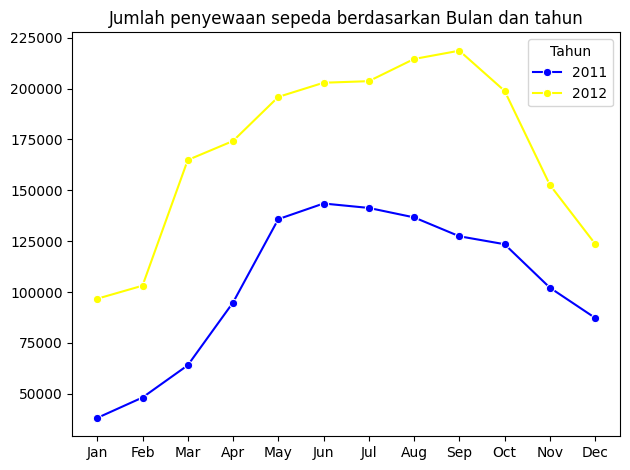

In [35]:
day_df['month'] = pd.Categorical(day_df['month'], categories= 
    ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
    ordered=True)


day_df['year'] = day_df['year'].replace({0: 2011, 1: 2012})

monthly_counts = day_df.groupby(by=["month", "year"]).agg({
    "count": "sum"
}).reset_index()

sns.lineplot(
    data=monthly_counts,
    x="month",
    y="count",
    hue="year",
    palette=["blue", "yellow"],  
    marker="o"
)

plt.title("Jumlah penyewaan sepeda berdasarkan Bulan dan tahun")
plt.xlabel(None)
plt.ylabel(None)
plt.legend(title="Tahun", loc="upper right")
plt.tight_layout()
plt.show()

*Berdasarkan visualisasi lineplot di atas, dapat disimpulkan bahwa tahun 2012 secara jelas lebih unggul dibandingkan dengan tahun 2011 dari Januari hingga Desember. Puncak penyewaan sepeda di tahun 2012 terjadi pada bulan September, sedangkan bulan dengan penyewaan terendah adalah Januari. Sementara itu, di tahun 2011, puncak penyewaan terjadi pada bulan Juni, dan bulan dengan penyewaan paling rendah juga terjadi pada bulan Januari.*

### *Pertanyaan 2*: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

Total number of bike rentals: 10872.595532992458


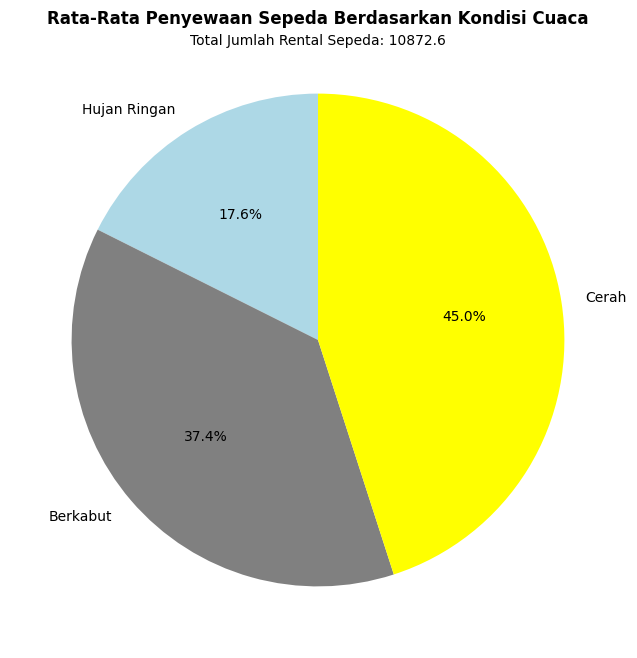

In [36]:
avg_weather = all_bike_df.groupby('label_musim')['cnt_day'].mean().reset_index().sort_values("cnt_day")
total_rentals = avg_weather['cnt_day'].sum()
labels = avg_weather['label_musim']
sizes = avg_weather['cnt_day']

colors = ['lightblue', 'grey', 'yellow']  

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct=lambda pct: '{:.1f}%'.format(pct), startangle=90, colors=colors)  # Menambahkan parameter colors
plt.title('Rata-Rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca', fontsize=12, fontweight='bold')
plt.ylabel('')
plt.text(0, 1.2, f"Total Jumlah Rental Sepeda: {round(total_rentals, 1)}", ha='center')
print(f"Total number of bike rentals: {total_rentals}")

plt.show()


*Pada visualisasi data di atas, terlihat bahwa presentase rata-rata penyewaan sepeda tertinggi terdapat pada kondisi cuaca yang cerah, yaitu sekitar 45% dari total 10872.6 jumlah rental sepeda. Sedangkan presentase rata-rata penyewaan sepeda terendah terdapat pada kondisi cuaca hujan ringan dengan 17.6% dari total jumlah rental sepeda.*

### *Pertanyaan 3*: Bagaimana pengaruh hari biasa dan hari libur terhadap jumlah penyewaan sepeda?

C:\Users\HP\AppData\Local\Temp\ipykernel_3204\3211493114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette=['green', 'red'])


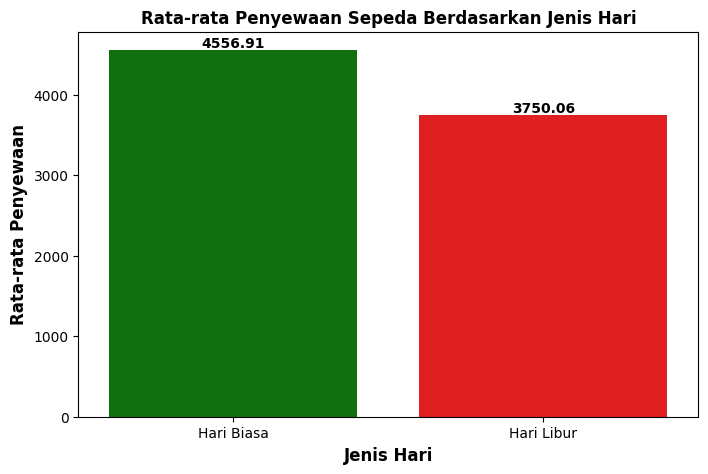

In [37]:
avg_holiday = all_bike_df.groupby('holiday_day')['cnt_day'].mean().reset_index().sort_values("holiday_day")

plt.figure(figsize=(8, 5))


sns.barplot(x='holiday_day', y='cnt_day', data=avg_holiday, palette=['green', 'red'])


plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Jenis Hari', fontsize=12, fontweight='bold')
plt.xlabel('Jenis Hari', fontsize=12, fontweight='bold')
plt.ylabel('Rata-rata Penyewaan', fontsize=12, fontweight='bold')

# Memastikan urutan label x-axis benar
plt.xticks([0, 1], ['Hari Biasa', 'Hari Libur'])  

# Menambahkan nilai di atas setiap bar dengan data yang benar
for i, row in avg_holiday.iterrows():
    plt.text(i, row['cnt_day'] + 0.5, round(row['cnt_day'], 2), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Menampilkan grafik
plt.show()

*Rata-rata penyewaan sepeda paling banyak terjadi pada saat hari biasa, yaitu sekitar 4556.91 sepeda yang tersewa.*

### *Pertanyaan 4*: Berapa rata rata jumlah penyewaan sepeda per jam dan bagaimana variasinya sepanjang hari?

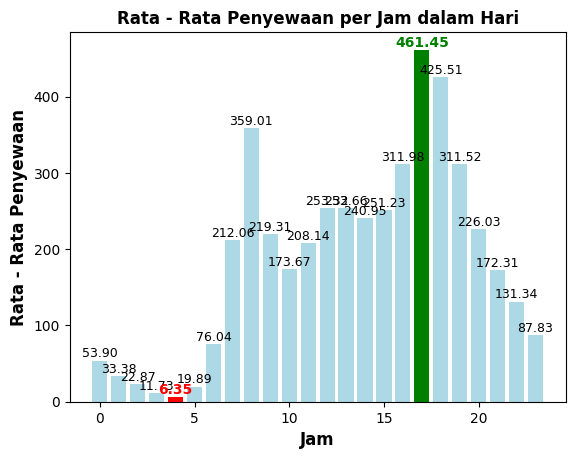

In [38]:
import numpy as np

# Menghitung rata-rata penyewaan per jam
rental_jam = all_bike_df.groupby('hr')['cnt_hour'].mean()

# Menentukan nilai maksimum dan minimum
max_value = rental_jam.max()
min_value = rental_jam.min()

# Mengatur warna berdasarkan nilai
colors = np.where(rental_jam == max_value, 'green', np.where(rental_jam == min_value, 'red', 'lightblue'))

# Membuat bar chart
plt.bar(rental_jam.index, rental_jam.values, color=colors)

# Menambahkan nilai tertinggi dan terendah di atas bar
for i, value in enumerate(rental_jam):
    if value == max_value:
        plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='green')
    elif value == min_value:
        plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='red')
    else:
        plt.text(i, value + 0.5, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Menambahkan judul dan label
plt.title('Rata - Rata Penyewaan per Jam dalam Hari', fontsize=12, fontweight='bold')
plt.xlabel('Jam', fontsize=12, fontweight='bold')
plt.ylabel('Rata - Rata Penyewaan', fontsize=12, fontweight='bold')

# Menampilkan grafik
plt.show()


*Rata-rata penyewaan sepedah paling banyak terjadi pada jam 17.00 dengan nilai 461.45 penyewaan. Sedangkan paling sedikit pada jam 04.00 dengan nilai 6.35 penyewaan.*

## Conclusion

- *Pertanyaan 1*:
Pada visualisasi kali ini, dapat kita amati pada kedua tahun yakni 2011 dan 2012, terjadi perbedaan puncak dan dasar bulan pada kedua tahun tersebut. Puncak dari tahun 2011 berada pada bulan Juni dan dasarnya berada pada bulan Januari. Sedangkan Puncak dari tahun 2012 terdapat pada bulan September dan dasarnya sama yakni bulan Januari. Dan dari kedua visualisasi tersebut dapat kita amati bahwa jumlah total sepeda yang disewakan pada tahun 2012, seluruhnya lebih tinggi daripada pada tahun 2011.

- *Pertanyaan 2*: 
Pada visualisasi data di atas, dapat dilihat bahwa persentase rata-rata penyewaan sepeda tertinggi terjadi pada kondisi cuaca cerah, yaitu sekitar 45% dari total 10.872,6 rental sepeda. Sementara itu, untuk cuaca berkabut, persentase rata-rata penyewaannya mencapai 37,4%. Di sisi lain, persentase rata-rata penyewaan sepeda terendah terdapat pada kondisi cuaca hujan ringan, yaitu 17,6% dari total jumlah rental sepeda. Dari hal tersebut, dapat disimpulkan bahwa sebagian besar orang bersepeda saat kondisi cuaca sedang cerah dan tidak terjadi hujan, dikarenakan sepeda tidak dapat melindungi kita dari hujan.

- *Pertanyaan 3*: 
Rata-rata penyewaan sepeda tertinggi terjadi pada hari biasa, yaitu sekitar 4.556,91 sepeda yang disewa. Sementara itu, pada hari libur, rata-rata penyewaan sepeda hanya sekitar 3.750,06. Hal ini menunjukkan bahwa lebih banyak orang menggunakan sepeda pada hari biasa, karena hari kerja dianggap lebih produktif dibandingkan hari libur. Banyak orang kemungkinan menyewa sepeda untuk pergi ke tempat kerja atau keperluan lain yang memerlukan penggunaan sepeda. Di sisi lain, pada hari libur, penyewaan sepeda cenderung lebih sedikit karena tidak ada keperluan untuk pergi ke lokasi tertentu, terutama untuk bekerja.

- *Pertanyaan 4*:
Rata-rata penyewaan sepeda tertinggi terjadi pada pukul 17.00, dengan jumlah 461,45 penyewaan. Hal ini kemungkinan disebabkan karena jam tersebut merupakan waktu pulang kerja atau sekolah, di mana banyak orang menggunakan sepeda sebagai sarana transportasi untuk kembali ke rumah. Selain itu, pada sore hari, cuaca biasanya lebih sejuk dan nyaman untuk bersepeda, sehingga lebih banyak orang yang tertarik menggunakan sepeda pada waktu tersebut. Sebaliknya, penyewaan sepeda paling sedikit terjadi pada pukul 04.00, dengan hanya 6,35 penyewaan. Jam ini merupakan waktu dini hari ketika sebagian besar orang masih beristirahat, sehingga aktivitas di luar rumah, termasuk bersepeda, sangat minim. Selain itu, pada jam tersebut, kondisi jalan mungkin masih gelap dan kurang ramai, sehingga orang cenderung enggan untuk bersepeda di waktu itu